<a href="https://colab.research.google.com/github/AI-fanatic24/ASD-DS-AI-ML-Internship/blob/Iris-Flower-Classification/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [890]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [891]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [892]:
df.shape

(150, 5)

In [893]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [894]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


NO NULL VALUES PRESENT

In [895]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


HANDLING OUTLIERS

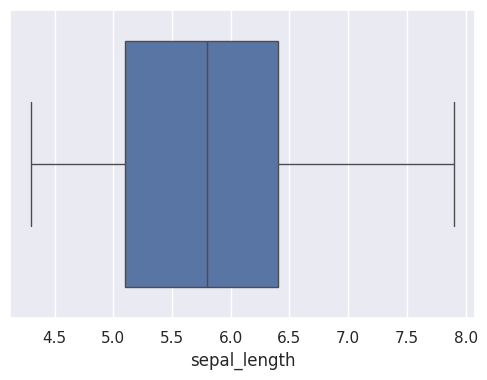

In [896]:
sns.set(rc={'figure.figsize':(6,4)})
sns.boxplot(df,x='sepal_length')
plt.show()

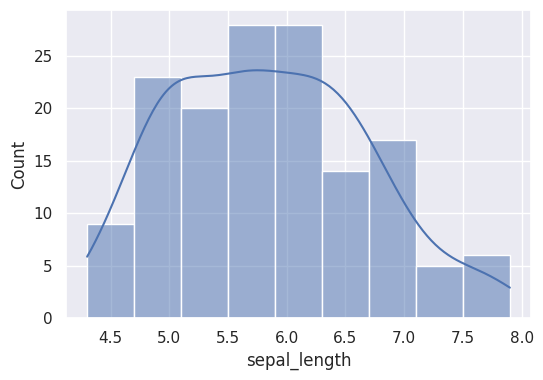

In [897]:
sns.histplot(df,x='sepal_length',kde=True)
plt.show()

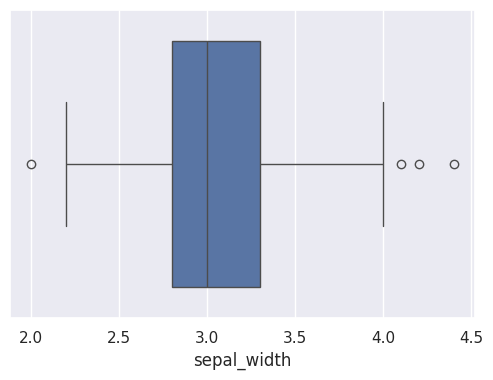

In [898]:
sns.boxplot(df,x='sepal_width')
plt.show()

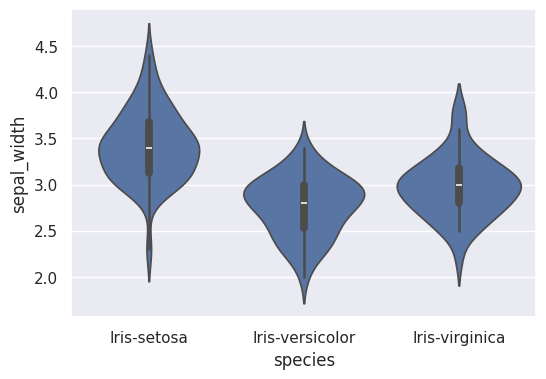

In [899]:
sns.violinplot(df,x='species',y='sepal_width',)
plt.show()

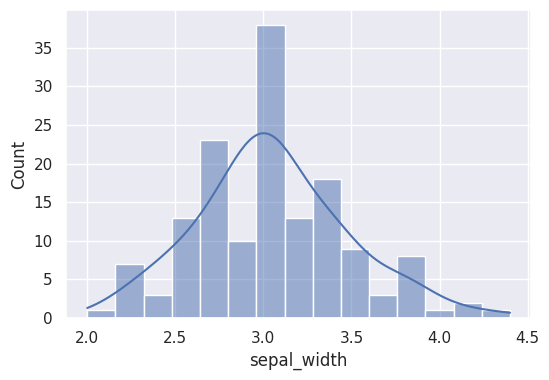

In [900]:
sns.histplot(df,x='sepal_width',kde=True,bins=15)
plt.show()

In [901]:
Q1,median,Q3 = np.percentile(df['sepal_width'],[25,50,75])
IQR = Q3-Q1
lower_fence = Q1-(1.5*IQR)
upper_fence = Q3+(1.5*IQR)
print('IQR',IQR)
print('Lower fence',lower_fence)
print('Upper fence',upper_fence)

IQR 0.5
Lower fence 2.05
Upper fence 4.05


In [902]:
df.loc[df['sepal_width']>upper_fence,'sepal_width'] = upper_fence
df.loc[df['sepal_width']<lower_fence,'sepal_width'] = lower_fence

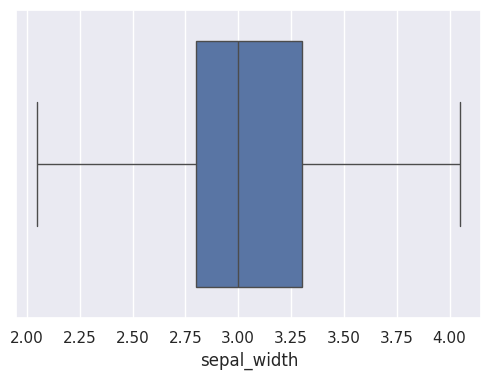

In [903]:
sns.boxplot(df,x='sepal_width')
plt.show()

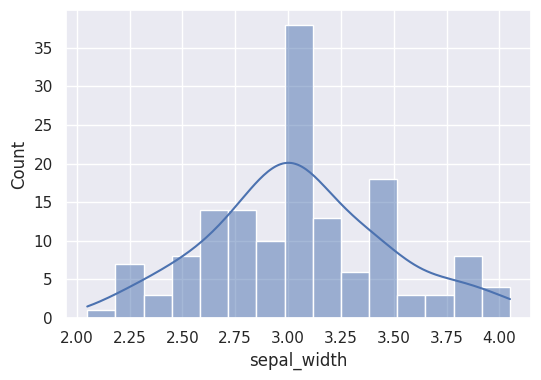

In [904]:
sns.histplot(df,x='sepal_width',kde=True,bins=15)
plt.show()

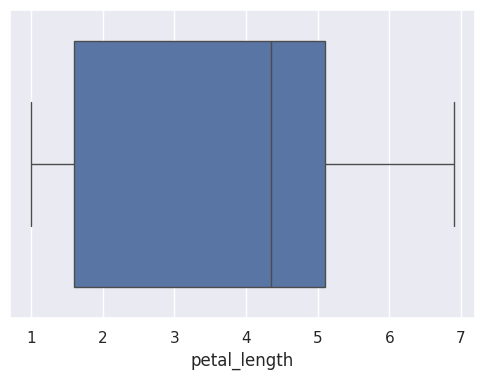

In [905]:
sns.boxplot(df,x='petal_length')
plt.show()

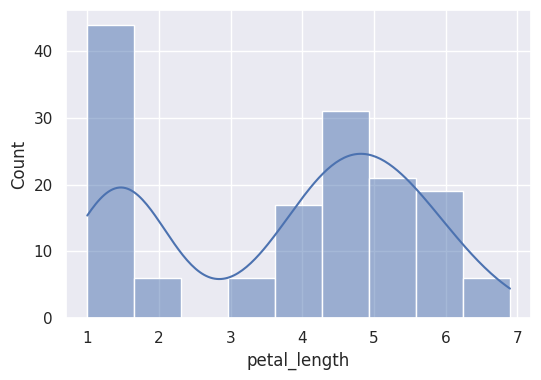

In [906]:
sns.histplot(df,x='petal_length',kde=True)
plt.show()

Checking imbalance in data

In [907]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [908]:
fontdict = {'family':'serif','color':'darkred','size':15}

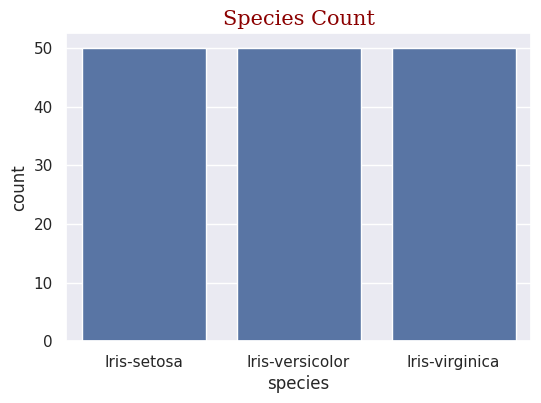

In [909]:
sns.countplot(df,x='species')
plt.title('Species Count',fontdict=fontdict)
plt.show()

Dataset is perfectly balanced

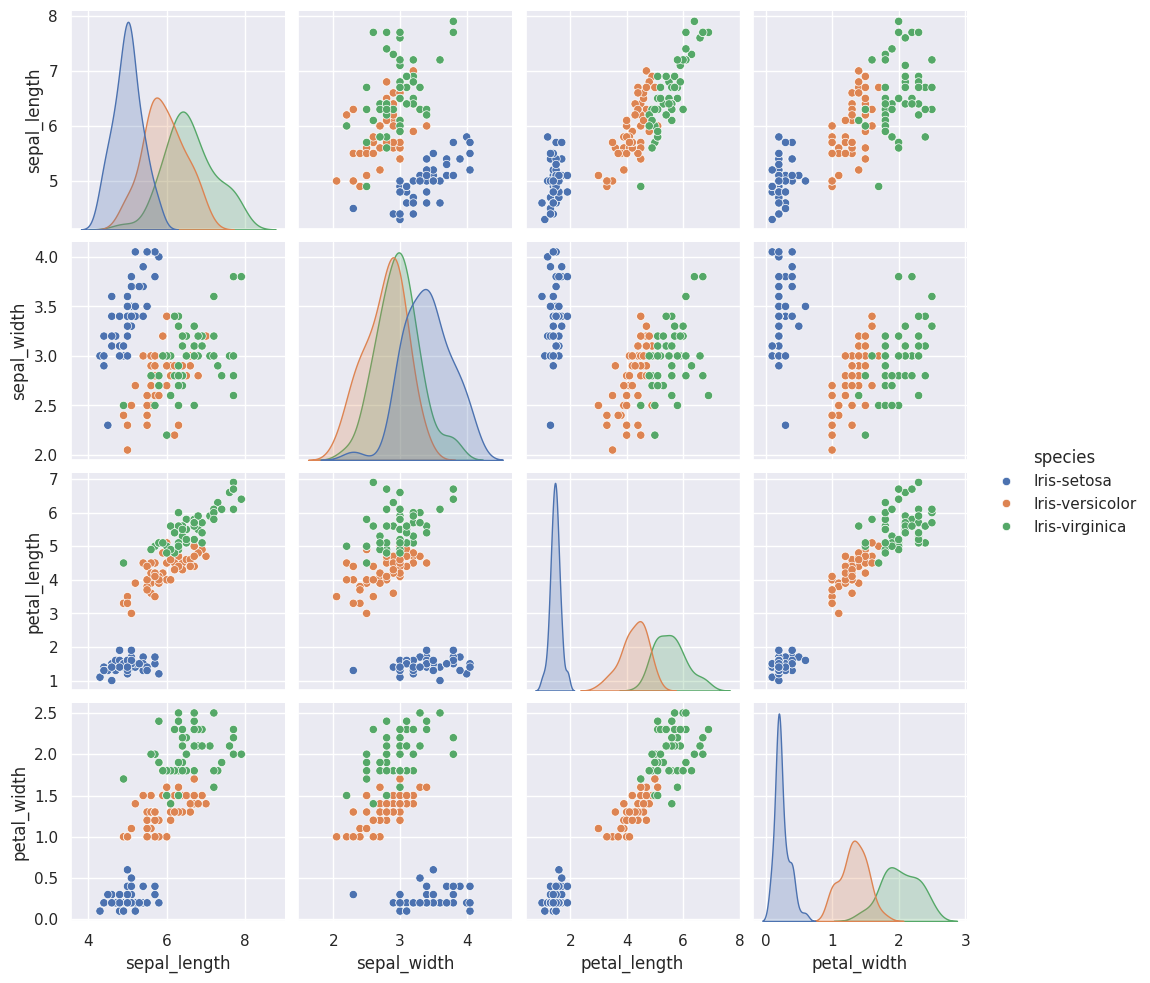

In [910]:
sns.pairplot(df,hue='species')
plt.show()

Label encoding the target variable 'species'.

In [911]:
df.loc[df['species']=='Iris-setosa','species']=0
df.loc[df['species']=='Iris-versicolor','species']=1
df.loc[df['species']=='Iris-virginica','species']=2
df['species'] = df['species'].astype(int)

In [912]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


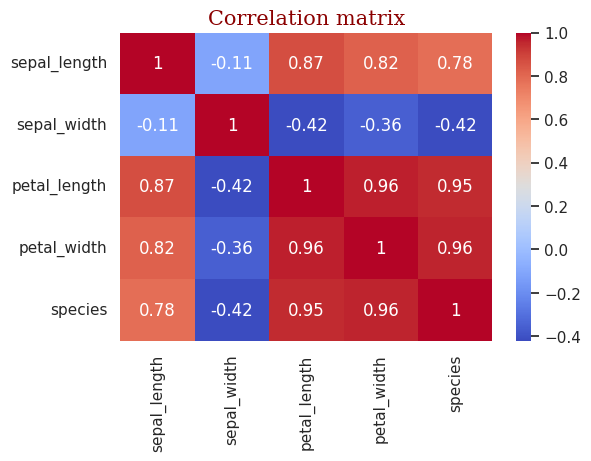

In [913]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation matrix',fontdict=fontdict)
plt.show()

In [914]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [915]:
features = df[['sepal_length', 'sepal_width','petal_length','petal_width']].to_numpy()
features

array([[5.1 , 3.5 , 1.4 , 0.2 ],
       [4.9 , 3.  , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.3 , 0.2 ],
       [4.6 , 3.1 , 1.5 , 0.2 ],
       [5.  , 3.6 , 1.4 , 0.2 ],
       [5.4 , 3.9 , 1.7 , 0.4 ],
       [4.6 , 3.4 , 1.4 , 0.3 ],
       [5.  , 3.4 , 1.5 , 0.2 ],
       [4.4 , 2.9 , 1.4 , 0.2 ],
       [4.9 , 3.1 , 1.5 , 0.1 ],
       [5.4 , 3.7 , 1.5 , 0.2 ],
       [4.8 , 3.4 , 1.6 , 0.2 ],
       [4.8 , 3.  , 1.4 , 0.1 ],
       [4.3 , 3.  , 1.1 , 0.1 ],
       [5.8 , 4.  , 1.2 , 0.2 ],
       [5.7 , 4.05, 1.5 , 0.4 ],
       [5.4 , 3.9 , 1.3 , 0.4 ],
       [5.1 , 3.5 , 1.4 , 0.3 ],
       [5.7 , 3.8 , 1.7 , 0.3 ],
       [5.1 , 3.8 , 1.5 , 0.3 ],
       [5.4 , 3.4 , 1.7 , 0.2 ],
       [5.1 , 3.7 , 1.5 , 0.4 ],
       [4.6 , 3.6 , 1.  , 0.2 ],
       [5.1 , 3.3 , 1.7 , 0.5 ],
       [4.8 , 3.4 , 1.9 , 0.2 ],
       [5.  , 3.  , 1.6 , 0.2 ],
       [5.  , 3.4 , 1.6 , 0.4 ],
       [5.2 , 3.5 , 1.5 , 0.2 ],
       [5.2 , 3.4 , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.6 , 0.2 ],
       [4.

In [916]:
target = df[['species']].to_numpy()
target

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

Normalizing the features

In [917]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [918]:
features

array([[-9.00681170e-01,  1.06572221e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.20170457e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.54186609e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.17008076e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.30290074e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  2.01443634e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.28543675e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.28543675e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.57348990e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.17008076e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.54007927e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.28543675e-01, -1.22754100e+00,
      

Splitting the data into Training set and Testing set

In [919]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,shuffle=True,stratify=target,random_state=42)

In [920]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

In [921]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

In [922]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


Logistic Regression

In [923]:
model = LogisticRegression(multi_class='ovr')
penalty = ['l1', 'l2', 'elasticnet',None]
c_value = [1,0.1,0.01,0.001,10,50,100]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
parameter_dict = dict(penalty=penalty,C=c_value,solver=solver)

In [924]:
cv = StratifiedKFold(shuffle=True,random_state=10)

Hyperparameter Tuning using GridSearchCV

In [925]:
grid = GridSearchCV(estimator=model,param_grid=parameter_dict,cv=cv,scoring='accuracy',verbose=3)
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 10, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=3)

In [926]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.917 total time=   0.0s
[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.958 total time=   0.0s
[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=1.000 total time=   0.0s
[CV 5/5] END .C=1, penalty=l1, solver=liblinear;, score=0.917 total time=   0.0s
[CV 1/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ...C=1, penalty=l1, solver=newton

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 10, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=3)

In [927]:
grid.best_params_

{'C': 1, 'penalty': None, 'solver': 'lbfgs'}

In [928]:
grid.best_score_

np.float64(0.9583333333333334)

In [929]:
y_pred = grid.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

In [930]:
print("----ACCURACY----")
print(accuracy_score(y_test,y_pred))
print()
print("----CONFUSION MATRIX----")
print(confusion_matrix(y_test,y_pred))
print()
print("----CLASSIFICATION REPORT----")
print(classification_report(y_test,y_pred))

----ACCURACY----
0.9666666666666667

----CONFUSION MATRIX----
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

----CLASSIFICATION REPORT----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Hyperparameter Tuning using RandomizedSearchCV

In [931]:
from sklearn.model_selection import RandomizedSearchCV

In [932]:
random = RandomizedSearchCV(estimator=model,param_distributions=parameter_dict,cv=5,scoring='accuracy')
random

RandomizedSearchCV(cv=5, estimator=LogisticRegression(multi_class='ovr'),
                   param_distributions={'C': [1, 0.1, 0.01, 0.001, 10, 50, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [933]:
random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(multi_class='ovr'),
                   param_distributions={'C': [1, 0.1, 0.01, 0.001, 10, 50, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [934]:
random.best_params_

{'solver': 'newton-cg', 'penalty': None, 'C': 1}

In [935]:
random.best_score_

np.float64(0.9583333333333334)

In [936]:
y_pred = random.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

In [937]:
print("----ACCURACY----")
print(accuracy_score(y_test,y_pred))
print()
print("----CONFUSION MATRIX----")
print(confusion_matrix(y_test,y_pred))
print()
print("----CLASSIFICATION REPORT----")
print(classification_report(y_test,y_pred))

----ACCURACY----
0.9666666666666667

----CONFUSION MATRIX----
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

----CLASSIFICATION REPORT----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



SVM-SVC

In [938]:
from sklearn.svm import SVC

In [939]:
svc = SVC()

Hyperparameter Tuning using GridSearchCV

In [940]:
param_dict = {'C':[1,0.1,0.01,0.001,10,50,100],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4,5],'gamma':['scale', 'auto',1,0.1,0.01,0.001,0.0001]}

In [941]:
grid = GridSearchCV(estimator=svc,param_grid=param_dict,cv=3,refit=True,verbose=3,scoring='accuracy')
grid

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 10, 50, 100],
                         'degree': [1, 2, 3, 4, 5],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [942]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 980 candidates, totalling 2940 fits
[CV 1/3] END C=1, degree=1, gamma=scale, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/3] END C=1, degree=1, gamma=scale, kernel=linear;, score=0.950 total time=   0.0s
[CV 3/3] END C=1, degree=1, gamma=scale, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/3] END C=1, degree=1, gamma=scale, kernel=poly;, score=0.950 total time=   0.0s
[CV 2/3] END C=1, degree=1, gamma=scale, kernel=poly;, score=0.925 total time=   0.0s
[CV 3/3] END C=1, degree=1, gamma=scale, kernel=poly;, score=0.975 total time=   0.0s
[CV 1/3] END C=1, degree=1, gamma=scale, kernel=rbf;, score=0.975 total time=   0.0s
[CV 2/3] END C=1, degree=1, gamma=scale, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/3] END C=1, degree=1, gamma=scale, kernel=rbf;, score=0.975 total time=   0.0s
[CV 1/3] END C=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.925 total time=   0.0s
[CV 2/3] END C=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.850 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 10, 50, 100],
                         'degree': [1, 2, 3, 4, 5],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [943]:
grid.best_params_

{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [944]:
grid.best_score_

np.float64(0.975)

In [945]:
y_pred = grid.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [946]:
print("----ACCURACY----")
print(accuracy_score(y_test,y_pred))
print()
print("----CONFUSION MATRIX----")
print(confusion_matrix(y_test,y_pred))
print()
print("----CLASSIFICATION REPORT----")
print(classification_report(y_test,y_pred))

----ACCURACY----
1.0

----CONFUSION MATRIX----
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

----CLASSIFICATION REPORT----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Hyperparameter Tuning using RandomizedSearchCV

In [960]:
random = RandomizedSearchCV(estimator=svc,param_distributions=param_dict,cv=3,refit=True,verbose=3,scoring='accuracy')
random

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [1, 0.1, 0.01, 0.001, 10, 50, 100],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': ['scale', 'auto', 1, 0.1, 0.01,
                                                  0.001, 0.0001],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='accuracy', verbose=3)

In [961]:
random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END C=0.1, degree=3, gamma=0.001, kernel=linear;, score=0.950 total time=   0.0s
[CV 2/3] END C=0.1, degree=3, gamma=0.001, kernel=linear;, score=0.950 total time=   0.0s
[CV 3/3] END C=0.1, degree=3, gamma=0.001, kernel=linear;, score=0.975 total time=   0.0s
[CV 1/3] END C=50, degree=4, gamma=0.01, kernel=poly;, score=0.425 total time=   0.0s
[CV 2/3] END C=50, degree=4, gamma=0.01, kernel=poly;, score=0.325 total time=   0.0s
[CV 3/3] END C=50, degree=4, gamma=0.01, kernel=poly;, score=0.350 total time=   0.0s
[CV 1/3] END C=0.01, degree=4, gamma=0.0001, kernel=poly;, score=0.425 total time=   0.0s
[CV 2/3] END C=0.01, degree=4, gamma=0.0001, kernel=poly;, score=0.325 total time=   0.0s
[CV 3/3] END C=0.01, degree=4, gamma=0.0001, kernel=poly;, score=0.350 total time=   0.0s
[CV 1/3] END C=50, degree=5, gamma=1, kernel=sigmoid;, score=0.600 total time=   0.0s
[CV 2/3] END C=50, degree=5, gamma=1, kernel=sigmoid;, 

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [1, 0.1, 0.01, 0.001, 10, 50, 100],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': ['scale', 'auto', 1, 0.1, 0.01,
                                                  0.001, 0.0001],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='accuracy', verbose=3)

In [962]:
random.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'degree': 1, 'C': 50}

In [963]:
random.best_score_

np.float64(0.975)

In [964]:
y_pred = random.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [965]:
print("----ACCURACY----")
print(accuracy_score(y_test,y_pred))
print()
print("----CONFUSION MATRIX----")
print(confusion_matrix(y_test,y_pred))
print()
print("----CLASSIFICATION REPORT----")
print(classification_report(y_test,y_pred))

----ACCURACY----
1.0

----CONFUSION MATRIX----
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

----CLASSIFICATION REPORT----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



KNN

In [953]:
from sklearn.cluster import KMeans

In [954]:
kmeans = KMeans(n_clusters=3,n_init=10,random_state=12)

In [955]:
y_pred = kmeans.fit_predict(features[:,2:])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [956]:
y_pred_names=y_pred
y_pred_names = np.array(y_pred_names,dtype=object)
y_pred_names[y_pred_names==0] = 'Iris-setosa'
y_pred_names[y_pred_names==1] = 'Iris-versicolor'
y_pred_names[y_pred_names==2] = 'Iris-virginica'

In [957]:
print('----ACCURACY----')
print(accuracy_score(target,y_pred))
print()
print('----CONFUSION MATRIX----')
print(confusion_matrix(target,y_pred))
print()
print('----CLASSIFICATION REPORT----')
print(classification_report(target,y_pred))

----ACCURACY----
0.96

----CONFUSION MATRIX----
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]

----CLASSIFICATION REPORT----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [958]:
target_names = target
target_names = np.array(target_names,dtype=object).flatten()
target_names[target_names==0] = 'Iris-setosa'
target_names[target_names==1] = 'Iris-versicolor'
target_names[target_names==2] = 'Iris-virginica'

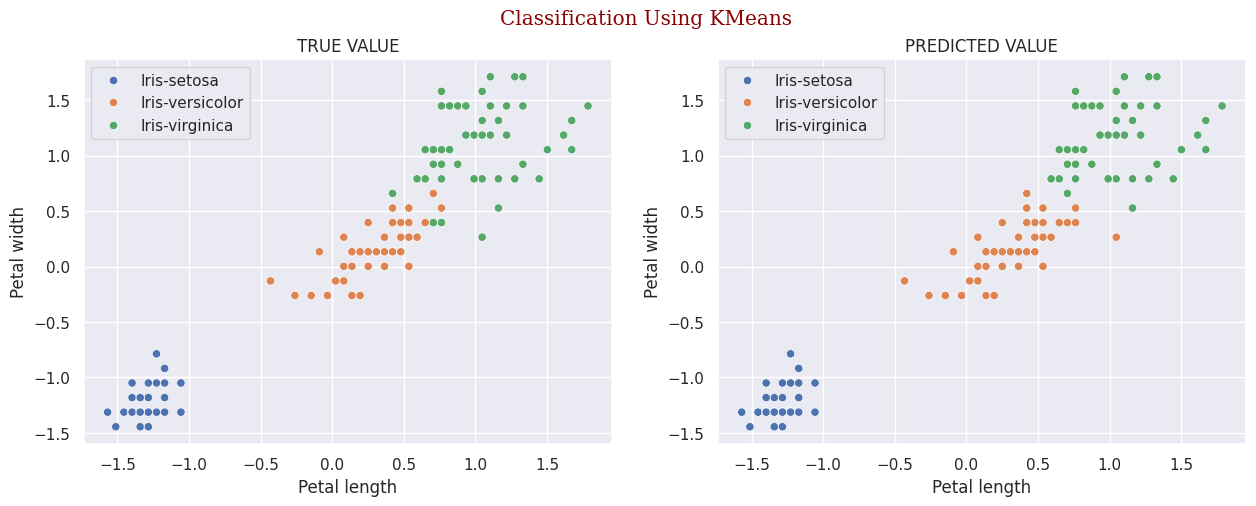

In [959]:
sns.set(rc={'figure.figsize':(15,5)})
plt.subplot(1,2,1)
sns.scatterplot(x=features[:,2],y=features[:,3],hue=target_names)
plt.title("TRUE VALUE")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.subplot(1,2,2)
sns.scatterplot(x=features[:,2],y=features[:,3],hue=y_pred_names)
plt.title("PREDICTED VALUE")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.suptitle("Classification Using KMeans",fontdict={'family':'serif','color':'darkred'})

plt.tight_layout

plt.show()